## Bolt Bootcamp Case Competition 2024 - Descriptive Analysis

#### Description

NullFraud Bank’s immediate task is to refine its fraud detection while ensuring transaction processes remain smooth and customer-friendly. The bank is currently wrestling with increased digital transactions, sophisticated cyber threats, and changing consumer habits – all of which have led to more false alarms, rising operational costs, and a risk to customer trust.

Design a solution that :
* Reduces fraud
* Cuts down on False Positives

In [16]:
# Load in dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning the Data

In [17]:
# Loading in the dataset
url = "data/bolt_data_set.xlsx"
raw_df = pd.read_excel(url)
print(raw_df.head())

  Card Identifier Transaction Date Transaction Time  Risk Assessment  \
0          card 1       2023-05-11       16:22:14.0            362.0   
1          card 2       2023-06-05       15:16:35.0            602.0   
2          card 3       2023-06-05       11:57:40.0            482.0   
3          card 4       2023-07-20       18:26:30.0            947.0   
4          card 5       2023-03-03       19:03:11.0           1382.0   

          Payment Method  Transaction Value Merchant Location  \
0  Paypass - Contactless              13.98               USA   
1                 Online              24.64               USA   
2                Unknown              15.00               USA   
3                 Online              30.56               USA   
4        Magnetic Stripe              50.85               USA   

  Card Present Status Chip Usage Cross-border Transaction (Yes/No)  \
0                  CP        Yes                                No   
1                 CNP         No    

In [30]:
# Checking for number of rows and columns
print(raw_df.shape)

(100000, 14)


In [31]:
# Checking for null values
print(raw_df.isnull().sum())

Card Identifier                        0
Transaction Date                       0
Transaction Time                       0
Risk Assessment                      972
Payment Method                         0
Transaction Value                      0
Merchant Location                      0
Card Present Status                    0
Chip Usage                             0
Cross-border Transaction (Yes/No)      0
Acquiring Institution ID               0
Merchant Identifier                    0
Merchant Category Code (MCC)           3
Fraud Indicator (Yes/No)               0
dtype: int64


We find that there are many null values for Risk Assessment. As this composes only 1% of the dataframe, we choose to first **remove** these NA values rather than fill them in with the median/mean as a strategy. 

In [32]:
clean_df = raw_df.dropna().copy()

# Check for null values
print(clean_df.isnull().sum())

Card Identifier                      0
Transaction Date                     0
Transaction Time                     0
Risk Assessment                      0
Payment Method                       0
Transaction Value                    0
Merchant Location                    0
Card Present Status                  0
Chip Usage                           0
Cross-border Transaction (Yes/No)    0
Acquiring Institution ID             0
Merchant Identifier                  0
Merchant Category Code (MCC)         0
Fraud Indicator (Yes/No)             0
dtype: int64


In [131]:
# Removing '0' Cross Border Transaction Values
# TO-DO

Now we will check that all columns contain the correct data types.

In [33]:
print(clean_df.dtypes)

Card Identifier                              object
Transaction Date                     datetime64[ns]
Transaction Time                             object
Risk Assessment                             float64
Payment Method                               object
Transaction Value                           float64
Merchant Location                            object
Card Present Status                          object
Chip Usage                                   object
Cross-border Transaction (Yes/No)            object
Acquiring Institution ID                     object
Merchant Identifier                          object
Merchant Category Code (MCC)                float64
Fraud Indicator (Yes/No)                     object
dtype: object


We will convert categorical data to the 'category' type.

In [34]:
# Convert categorical data to category type 
clean_df['Payment Method'] = clean_df['Payment Method'].astype('category')
clean_df['Merchant Location'] = clean_df['Merchant Location'].astype('category')
clean_df('Merchant Category Code (MCC)') = clean_df['Merchant Category Code (MCC)'].astype('category')

We will also remove duplicates to maintain data integrity.

In [35]:
clean_df = clean_df.drop_duplicates()

In [9]:
# Date and Time Manipulation
clean_df['Year'] = clean_df['Transaction Date'].dt.year
clean_df['Month'] = clean_df['Transaction Date'].dt.month
clean_df['Day'] = clean_df['Transaction Date'].dt.day
clean_df['Hour'] = clean_df['Transaction Date'].apply(lambda x : x.hour)

In [36]:
print(clean_df.dtypes)

Card Identifier                              object
Transaction Date                     datetime64[ns]
Transaction Time                             object
Risk Assessment                             float64
Payment Method                             category
Transaction Value                           float64
Merchant Location                          category
Card Present Status                          object
Chip Usage                                   object
Cross-border Transaction (Yes/No)            object
Acquiring Institution ID                     object
Merchant Identifier                          object
Merchant Category Code (MCC)                float64
Fraud Indicator (Yes/No)                     object
dtype: object


## Exploratory Data Analysis

### 1 | Descriptive Statistics

In [37]:
# Summary statistics for numerical fields
print(clean_df.describe())

                    Transaction Date  Risk Assessment  Transaction Value  \
count                          99024     99024.000000       99024.000000   
mean   2023-06-28 18:31:31.614153984       843.154468          68.751641   
min              2023-01-01 00:00:00         2.000000           0.000000   
25%              2023-03-30 00:00:00       352.000000           6.750000   
50%              2023-06-27 00:00:00       592.000000          18.960000   
75%              2023-09-27 00:00:00      1052.000000          49.742500   
max              2023-12-31 00:00:00      4932.000000       15000.000000   
std                              NaN       747.154146         295.451078   

       Merchant Category Code (MCC)  
count                  99024.000000  
mean                    5806.053573  
min                      742.000000  
25%                     5411.000000  
50%                     5812.000000  
75%                     5942.000000  
max                     9999.000000  
std        

In [38]:
# Frequency counts for categorical fields
print(clean_df['Payment Method'].value_counts())
print(clean_df['Merchant Location'].value_counts())
print(clean_df['Fraud Indicator (Yes/No)'].value_counts())

Payment Method
Online                   36654
Paypass - Contactless    20951
Chip                     16434
Subscription             11171
PayPass - Wallet          7573
Magnetic Stripe           3749
Unknown                    897
Phone                      772
Postal                     609
Mobile Wallet              114
Tap-to-Pay                  98
eCommerce                    2
Name: count, dtype: int64
Merchant Location
USA    85065
GBR     3423
FRA     1272
ESP      954
NLD      768
       ...  
RWA        1
SEN        1
GLP        1
SVN        1
SYC        1
Name: count, Length: 136, dtype: int64
Fraud Indicator (Yes/No)
No     98759
Yes      265
Name: count, dtype: int64


In [49]:
clean_df.head()

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No)
Transaction Date,,,,,,,,,,,,,
2023-05-11,card 1,16:22:14.0,362.0,Paypass - Contactless,13.98,USA,CP,Yes,No,acquirer 1,merchant 1,5812.0,No
2023-06-05,card 2,15:16:35.0,602.0,Online,24.64,USA,CNP,No,No,acquirer 2,merchant 2,4121.0,No
2023-06-05,card 3,11:57:40.0,482.0,Unknown,15.00,USA,CNP,No,No,acquirer 3,merchant 3,7211.0,No
2023-07-20,card 4,18:26:30.0,947.0,Online,30.56,USA,CNP,No,No,acquirer 1,merchant 4,5814.0,No
2023-03-03,card 5,19:03:11.0,1382.0,Magnetic Stripe,50.85,USA,CP,No,No,acquirer 4,merchant 1,5812.0,No


### 2 | Temporal Analysis

In [41]:
clean_df.set_index('Transaction Date', inplace=True)
# Check that transaction date is already the index
print(clean_df.index)

DatetimeIndex(['2023-05-11', '2023-06-05', '2023-06-05', '2023-07-20',
               '2023-03-03', '2023-07-22', '2023-12-19', '2023-12-14',
               '2023-02-07', '2023-10-21',
               ...
               '2023-03-14', '2023-03-20', '2023-12-30', '2023-03-09',
               '2023-07-13', '2023-11-22', '2023-03-01', '2023-11-28',
               '2023-10-14', '2023-09-03'],
              dtype='datetime64[ns]', name='Transaction Date', length=99024, freq=None)


We aim to analyse trends and patterns through comparing transaction dates as follows:

/var/folders/6k/_q478z_52mg7tnr4nntvqnrm0000gn/T/ipykernel_7710/1097574999.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_values = clean_df['Transaction Value'].resample('M').sum()


<Axes: title={'center': 'Monthly Transaction Value'}, xlabel='Transaction Date'>

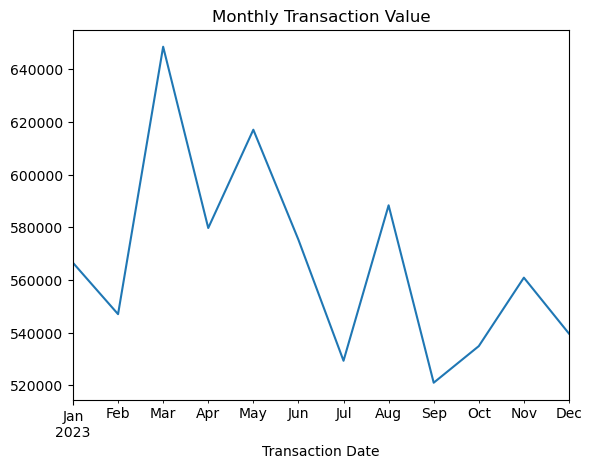

In [42]:
# Sum transaction values per month
monthly_values = clean_df['Transaction Value'].resample('M').sum()
monthly_values.plot(kind = 'line', title = 'Monthly Transaction Value')

### 3 | Categorical Analysis

We will then investigate categorical data by examining how different categories relate to other variables, especially whether the transaction was flagged as fraud.

#### General data distribution 

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


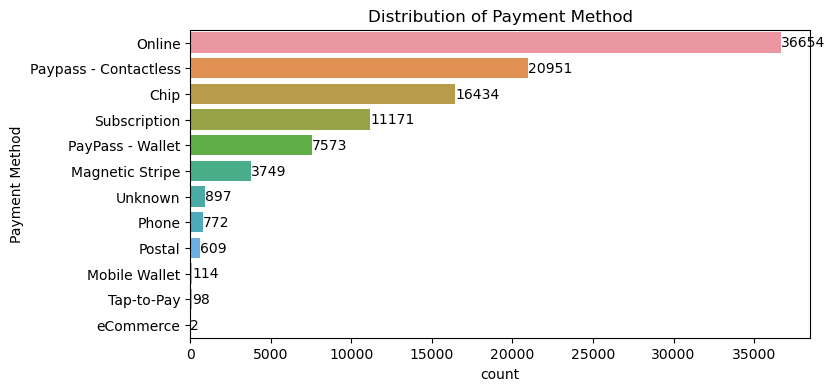

In [43]:
# Payment method
payment_order = clean_df['Payment Method'].value_counts().index
    
# print(clean_df['Payment Method'].value_counts())
plt.figure(figsize = (8, 4))
ax = sns.countplot(y = 'Payment Method', data = clean_df, order = payment_order)
plt.title(f'Distribution of Payment Method')

# Add counts
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() # bar's starting coordinates

    ax.text(x + width + 5, y + height/2, f'{int(width)}', va = 'center')

plt.show()

We will examine the proportion of fraudulent vs non-fraudulent transactions per payment method to hopefully detect a pattern.

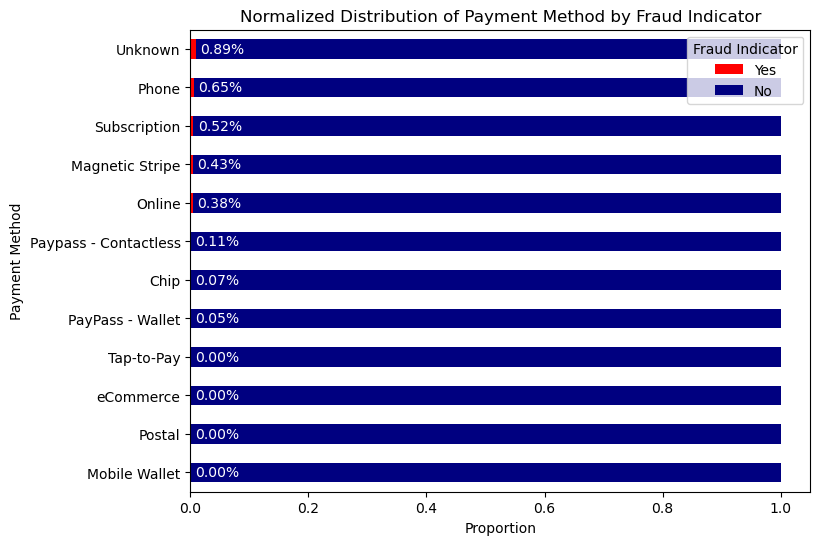

In [113]:
# Creating a normalized count of 'Payment Method' for fraudulent and non-fraudulent transactions
payment_fraud_dist = clean_df.groupby(['Payment Method', 'Fraud Indicator (Yes/No)']).size().unstack(fill_value=0)
payment_fraud_dist = payment_fraud_dist.apply(lambda x: x / x.sum(), axis=1)

# Calculate percentage of fraudulence for each payment method
total_counts = clean_df['Payment Method'].value_counts()
fraud_counts = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes']['Payment Method'].value_counts()
fraud_percentage = (fraud_counts / total_counts) * 100

# Convert fraud_percentage to a DataFrame
fraud_percentage_df.columns = ['Payment Method', 'Fraud Percentage']

# Merge to get fraud percentage alongside the normalized distribution
sorted_payment_fraud_dist = payment_fraud_dist.merge(fraud_percentage_df, on='Payment Method')

# Sort the merged DataFrame by fraud percentage
sorted_payment_fraud_dist.sort_values(by='Fraud Percentage', ascending=True, inplace=True)

# Plotting
sorted_payment_fraud_dist.set_index('Payment Method')[['Yes', 'No']].plot(kind='barh', stacked=True, figsize=(8, 6), color=['red', 'navy'])
plt.title('Normalized Distribution of Payment Method by Fraud Indicator')
plt.xlabel('Proportion')
plt.ylabel('Payment Method')
plt.legend(title='Fraud Indicator', loc='upper right')

# Annotating percentage of fraudulent transactions
for i, row in enumerate(sorted_payment_fraud_dist.iterrows()):
    payment_method, data = row
    # Extract the fraud percentage for the current row/payment method
    fraud_perc = data['Fraud Percentage']
    # Correct the y position to match the sorted order
    y = i
    # Position the text using the fraud_perc value, offset slightly to the right for visibility
    plt.text(data['Yes'] + 0.045, y, f'{fraud_perc:.2f}%', va='center', ha='center', color='white')

# Adjust xlim if needed to distinguish between fraud indicator percentages
# plt.xlim(0, 0.05)

plt.show()

In [44]:
# Merchant Distribution
# TO-DO

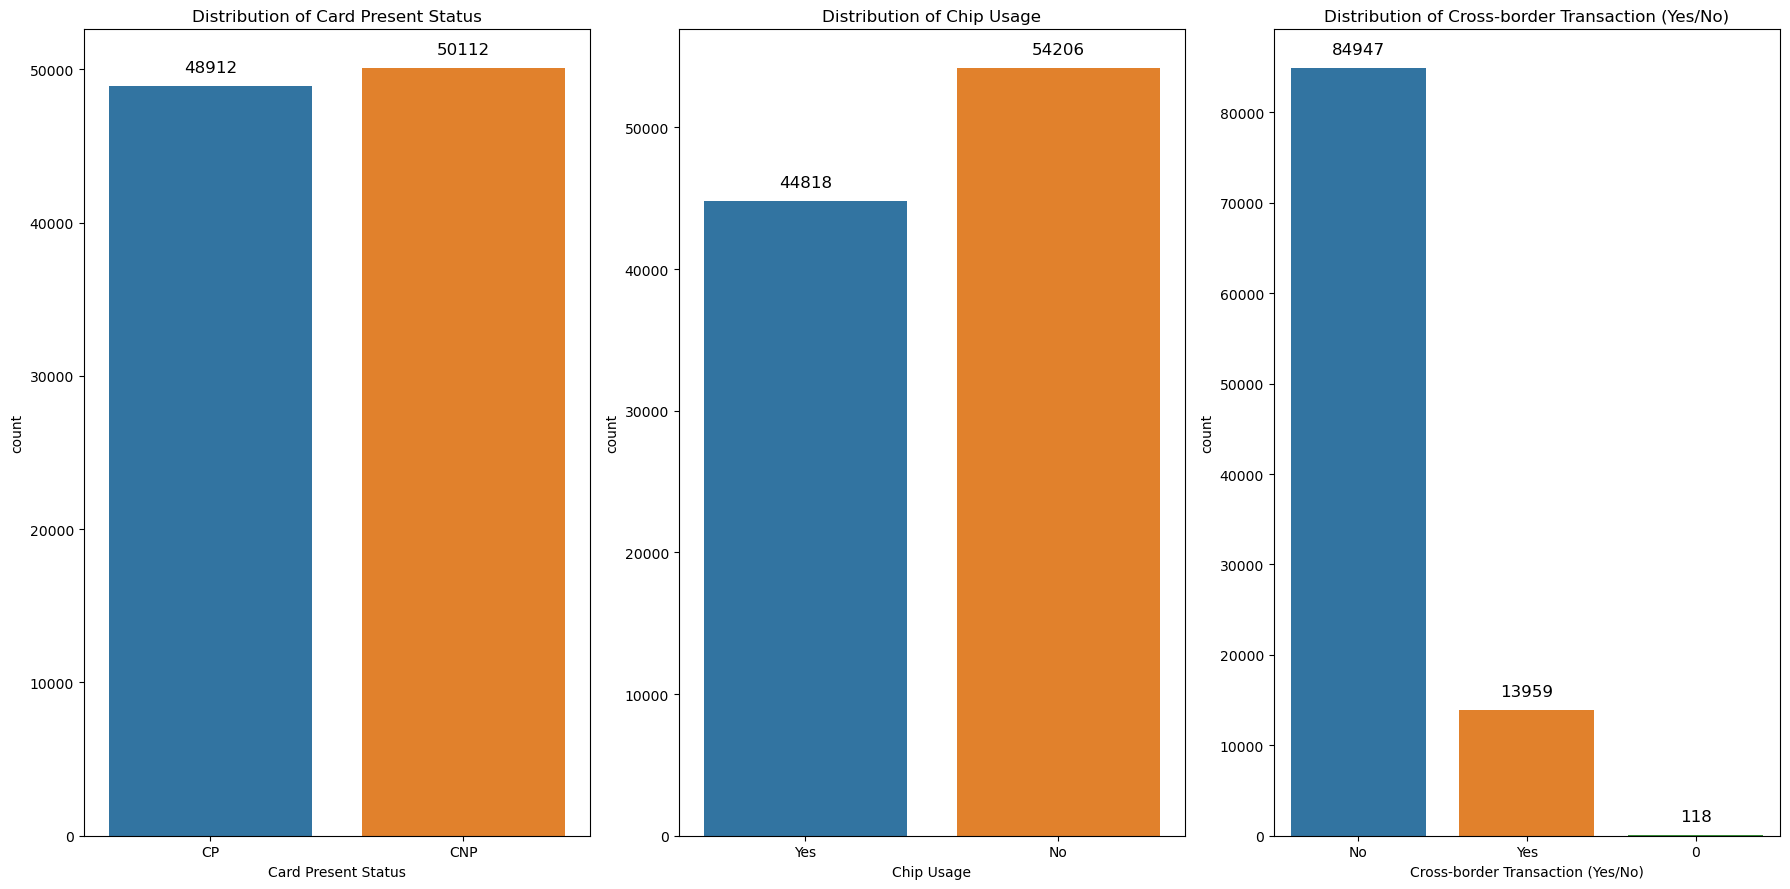

In [45]:
# Binary variables
# Card Present Status, Chip Usage, Cross-border Transaction (Yes/No)
categories = ['Card Present Status', 'Chip Usage', 'Cross-border Transaction (Yes/No)']

# Setting up matplotlib figure & axes
fig, axes = plt.subplots(1, len(categories), figsize = (18, 9))

for ax, c in zip(axes, categories):
    sns.countplot(x = c, data = clean_df, ax = ax)
    ax.set_title(f'Distribution of {c}')

    # Add counts 
    for p in ax.patches:
          ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, textcoords='offset points', xytext=(0,10))
    
plt.tight_layout()
plt.show()

While the counts for each category are quite balanced other than cross-border transactions (which is to be expected), we also plot the relation between these variables to fraudulence using stacked bar plots:

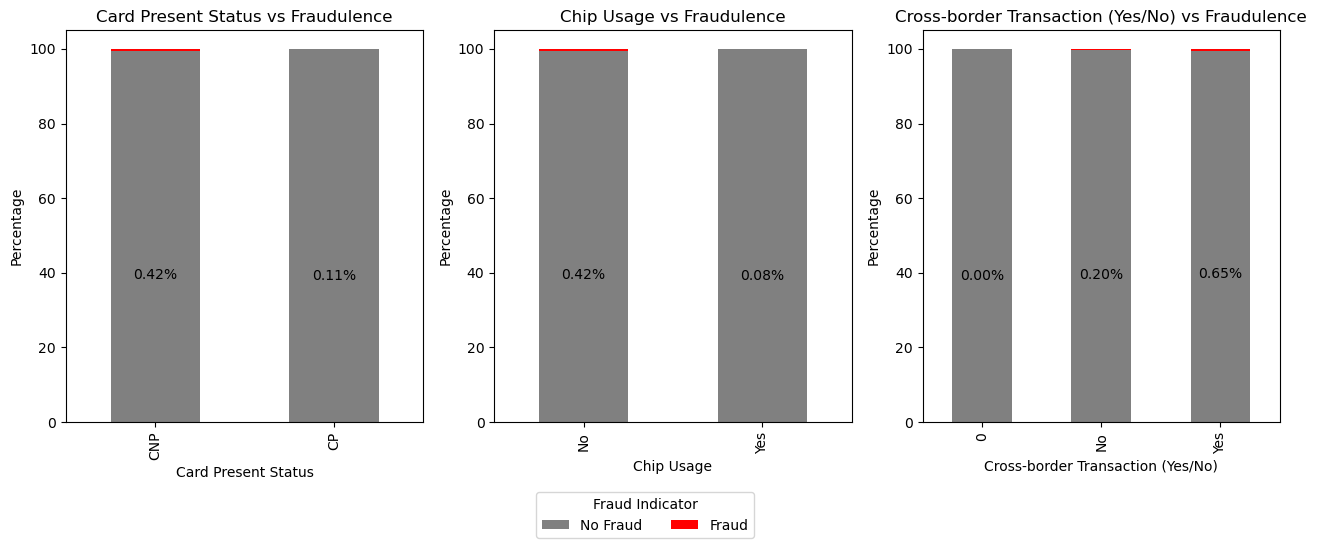

In [151]:
# Establishing binary variables
categories = ['Card Present Status', 'Chip Usage', 'Cross-border Transaction (Yes/No)']

# Setting up figure & axes
fig, axes = plt.subplots(1, len(categories), figsize=(13, 5))

# Loop through each binary variable 
for ax, c in zip(axes, categories):
    # Create a cross-tabulation of the binary variable and the fraud indicator
    crosstab = pd.crosstab(clean_df[c], clean_df['Fraud Indicator (Yes/No)'], normalize='index') * 100
    
    # Plot the stacked bar plot
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['grey', 'red'])
    
    # Set title and labels
    ax.set_title(f'{c} vs Fraudulence')
    ax.set_xlabel(c)
    ax.set_ylabel('Percentage')

    # Annotating with percentages
    for bar in ax.containers:  # iterate through the stacked bars
        for p in bar.patches:
            height = p.get_height()
            # Determine if the patch represents fraudulent transactions
            if p.get_facecolor() == (1.0, 0.0, 0.0, 1.0): 
                # Annotate the bar with the percentage for fraudulent transactions
                ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 100), 
                            textcoords='offset points')
                
for ax in axes:
    ax.legend().set_visible(False)

# Create a single legend for the entire figure
fig.legend(labels=['No Fraud', 'Fraud'], 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.1), 
           title='Fraud Indicator', 
           ncol=2)
plt.tight_layout()
plt.show()

Fraud Indicator (Yes/No)
No     98759
Yes      265
Name: count, dtype: int64


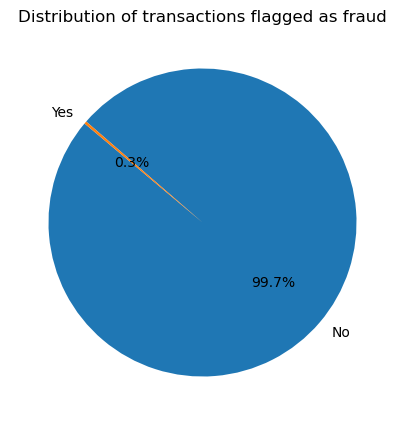

In [46]:
# Distribution of response variable 'Fraud Indicator'
plt.figure(figsize=(5, 5))

print(clean_df['Fraud Indicator (Yes/No)'].value_counts())

fraud_counts = clean_df['Fraud Indicator (Yes/No)'].value_counts()

fraud_counts.plot(kind = 'pie', 
                  autopct = '%1.1f%%', 
                  startangle = 140, 
                  labels = fraud_counts.index)
plt.title('Distribution of transactions flagged as fraud')
plt.ylabel('')
plt.show()

Very few transactions out of all are flagged for fraud. 

#### Cross tabulation with fraud indicator

In [ ]:
# Comparing distribution with fraud indicator
# TO-DO

#### Chi-Square Test for Independence

We perform the Chi-square test to see if there is a significant relationship between each categorical variable and the fraud indicator. This is useful for understanding whether the occurrence of fraud is independent of certain categories such as merchant location or payment method.

In [58]:
from scipy.stats import chi2_contingency

categories = ['Card Present Status', 
              'Chip Usage', 
              'Cross-border Transaction (Yes/No)', 
              'Risk Assessment',
              'Payment Method', 
              'Transaction Value',
              'Merchant Location',
              'Merchant Category Code (MCC)']

for category in categories[:-1]: 
    contingency_table = pd.crosstab(clean_df[category], clean_df['Fraud Indicator (Yes/No)'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{category} - p-value: {p}")

Card Present Status - p-value: 5.5080582649614084e-21
Chip Usage - p-value: 2.2489625883594703e-24
Cross-border Transaction (Yes/No) - p-value: 2.7212605833536566e-20
Risk Assessment - p-value: 0.0
Payment Method - p-value: 2.096096927326255e-21
Transaction Value - p-value: 0.0
Merchant Location - p-value: 0.0


**So what do these p-values tell us?**

1. **'Card Present Status', 'Chip Usage', 'Cross-border Transaction', 'Payment Method'** display **very small p-values**. These extremely small numbers suggest that the likelihood of observing the data if the null hypothesis were true (no association) is extremely low. In practical terms, these results indicate that there is a very strong statistical significance and a likely association between each of these categories and the occurence of fraud. The distribution of fraud indicators varies significantly across the different levels of these categorical variables.
2. **'Risk Assessment', 'Transaction Value', 'Merchant Location'** display a **p-value of 0** (likely due to rounding). This suggests a certain statistical association between these variables and the 'Fraud Indicator (Yes/No)'. 

#### Cramér's V Test

To measure the association between two categorical variables, we will conduct Cramér's V test to quantify the strength of then association and uncover trends between the variables. A value close to 0 implies little association, and closer to 1 implies strong association.

In [59]:
# Establish categories tested:

categories = ['Card Present Status', 
              'Chip Usage', 
              'Cross-border Transaction (Yes/No)', 
              'Risk Assessment',
              'Payment Method', 
              'Transaction Value',
              'Merchant Location',
              'Merchant Category Code (MCC)']

def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
    return cramers_v

# Comparing 'Payment Method' with 'Fraud Indicator'
for c in categories:
    cramers_v_value = cramers_v(clean_df[c], clean_df['Fraud Indicator (Yes/No)'])
    print(f"{c}: {cramers_v_value}")

Card Present Status: 0.029699000107770202
Chip Usage: 0.03221870955414793
Cross-border Transaction (Yes/No): 0.02982791213417545
Risk Assessment: 0.303272109820295
Payment Method: 0.03387811446176552
Transaction Value: 0.2982871016089847
Merchant Location: 0.14173882348145306
Merchant Category Code (MCC): 0.1379185952599985


* ***WEAK ASSOCIATIONS:*** **Card Present Status (0.0297), Chip Usage (0.0322)**, **Cross-border Transaction (0.0298)**, and **Payment Method (0.0339)** have very low Cramér's V values, suggesting these variables have very weak associations with the variable they were compared against. These factors might not be strong predictors on their own for the variable of interest in your analysis.

* ***MODERATELY WEAK ASSOCIATIONS:*** **Merchant Location (0.1417)** and **Merchant Category Code (MCC) (0.1379)** have slightly higher but still relatively low Cramér's V values. There is a weak association with the variable they were compared against, indicating they have a bit more influence than the previously mentioned variables but still a limited predictive power.

* ***MODERATELY STRONG ASSOCIATIONS:*** **Risk Assessment (0.3033)** and **Transaction Value (0.2983)** stand out with the highest Cramér's V values among those listed, indicating a moderate association with the variable they were compared against. This suggests that these variables have a more substantial relationship and could be more significant predictors in your analysis.



### 4 | Correlation Analysis

One hot encode categorical variables for the correlation matrix.

We will first examine the relation between payment methods and fraud detection.

In [ ]:
df_encoded = pd.get_dummies(df_for_correlation, columns=['Payment Method', 
                                                         'Merchant Location', 
                                                         'Card Present Status', 
                                                         'Chip Usage', 
                                                         'Cross-border Transaction (Yes/No)'])

In [77]:
# TO-DO: One-hot encode all the variables and plot in correlation matrix

### 5 | Visualizing Insights

We also plot a numerical variables 'Risk Assessment' and 'Transaction Value' against 'Fraud Indicator (Yes/No)' using violin plots and histograms to identify trends and mean/median placements.

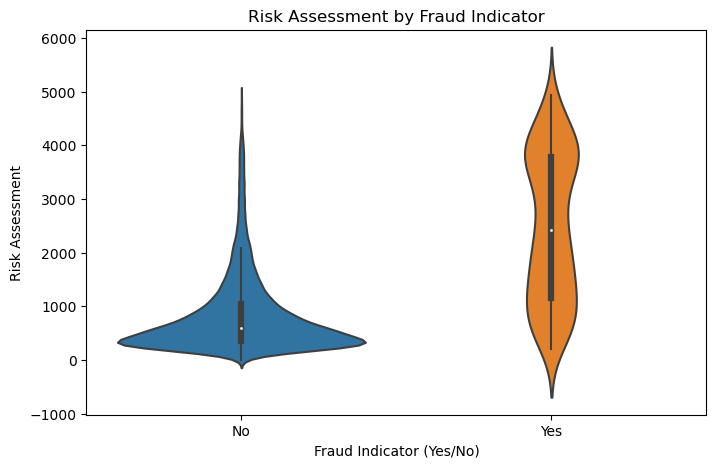

In [65]:
# For 'Risk Assessment'
# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='Fraud Indicator (Yes/No)', y='Risk Assessment', data=clean_df)
plt.title('Risk Assessment by Fraud Indicator')
plt.show()

**RISK ASSESSMENT**

* **Distribution Shape:** The 'Risk Assessment' for non-fraudulent transactions (No) is tightly concentrated around lower values with a narrow distribution, indicating that **most non-fraudulent transactions have a low-risk assessment score**. The distribution for fraudulent transactions (Yes) is wider, suggesting a **greater variability in the risk assessment scores for fraudulent transactions**.

* **Range:** The range of 'Risk Assessment' scores for fraudulent transactions is broader than for non-fraudulent ones, indicating that **fraudulent transactions can have a wide range of risk scores, but tend to have higher scores on average.**

* **Median and Quartiles:** The median (indicated by the white dot) for fraudulent transactions is higher than for non-fraudulent ones, which aligns with the expectation that transactions deemed more risky are more likely to be fraudulent.

* **Outliers:** The plot for non-fraudulent transactions **shows fewer outliers compared to the plot for fraudulent transactions**, indicating that most non-fraudulent transactions adhere to a lower risk profile.

In [74]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

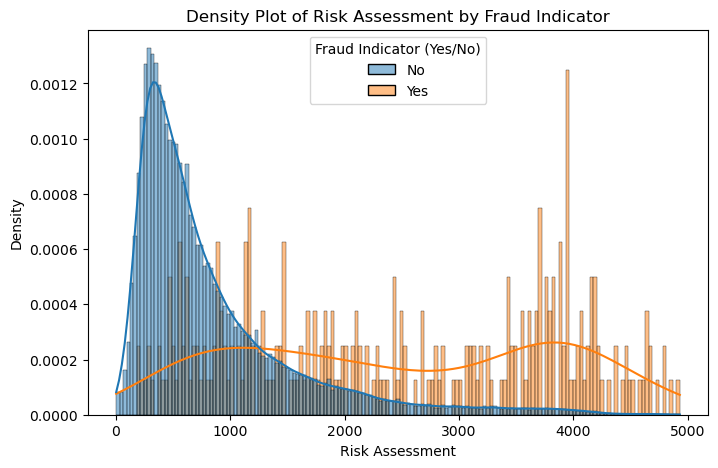

In [75]:
# Histogram
# For 'Risk Assessment'
plt.figure(figsize=(8, 5))
sns.histplot(data=clean_df, 
             x='Risk Assessment', 
             hue='Fraud Indicator (Yes/No)', 
             kde=True,  
             stat="density", 
             common_norm=False)
plt.title('Density Plot of Risk Assessment by Fraud Indicator')
plt.show()

There are outliers and significant variability in the 'Risk Assessment' scores for fraudulent transactions, indicating that while 'Risk Assessment' is a useful indicator, it should be used in conjunction with other features for more accurate fraud detection.

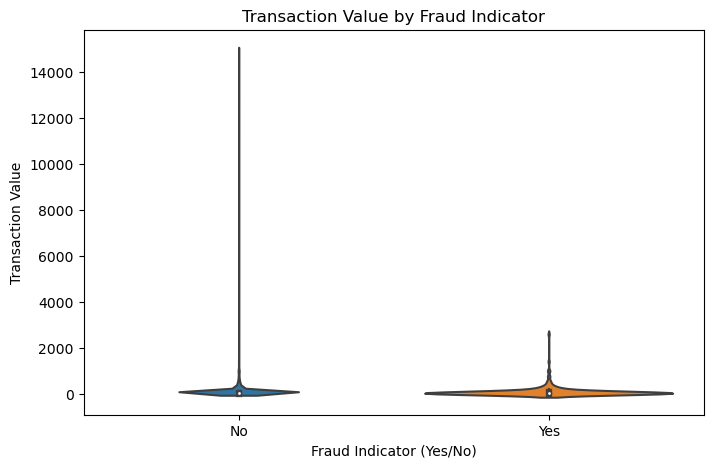

In [68]:
# For 'Transaction Value'
plt.figure(figsize=(8, 5))
sns.violinplot(x='Fraud Indicator (Yes/No)', y='Transaction Value', data=clean_df)
plt.title('Transaction Value by Fraud Indicator')
plt.show()

**TRANSACTION VALUE**, while showing some difference in the distribution between fraudulent and non-fraudulent transactions, does not appear to be as distinct. Both types of transactions can have low to high values, but strangely, extremely high transaction values are more commonly associated with non-fraudulent transactions.

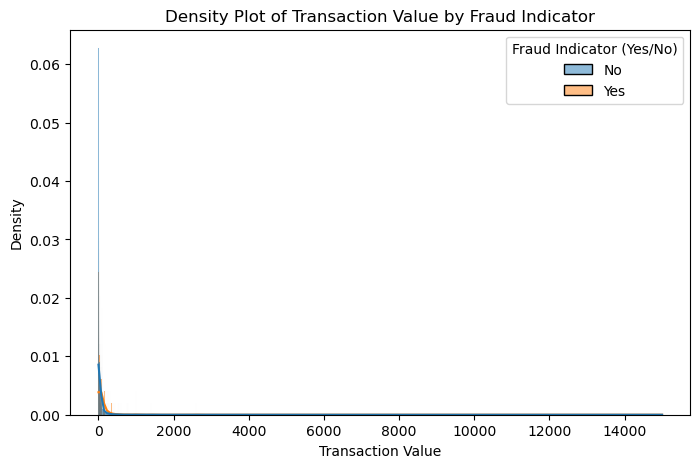

In [76]:
# Histogram
# For 'Transaction Value'
plt.figure(figsize=(8, 5))
sns.histplot(data=clean_df, 
             x='Transaction Value', 
             hue='Fraud Indicator (Yes/No)', 
             kde=True,  
             stat="density", 
             common_norm=False)
plt.title('Density Plot of Transaction Value by Fraud Indicator')
plt.show()

### 6 | Detecting Anomalies